In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

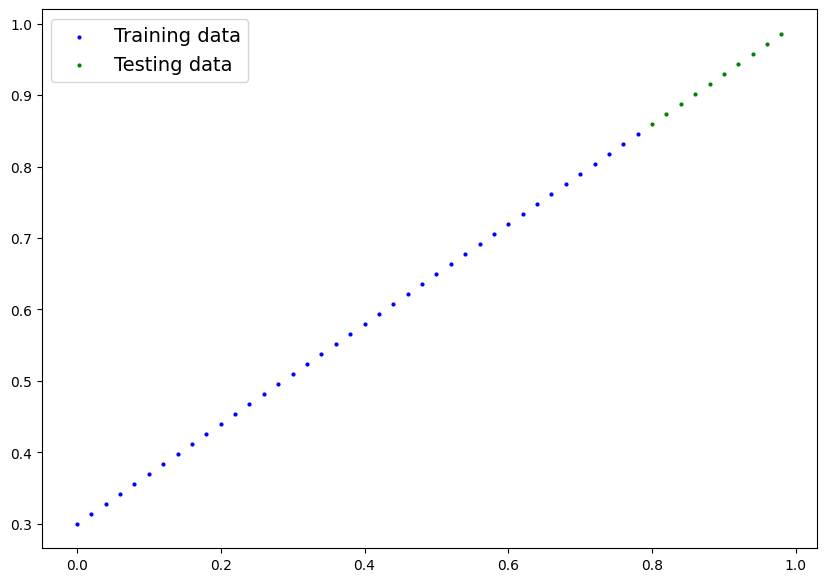

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions();

In [ ]:
class LinearRegressionModel(nn.Module):
      def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

      def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights* x + self.bias

In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(4)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([-1.6053], requires_grad=True),
 Parameter containing:
 tensor([0.2325], requires_grad=True)]

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)

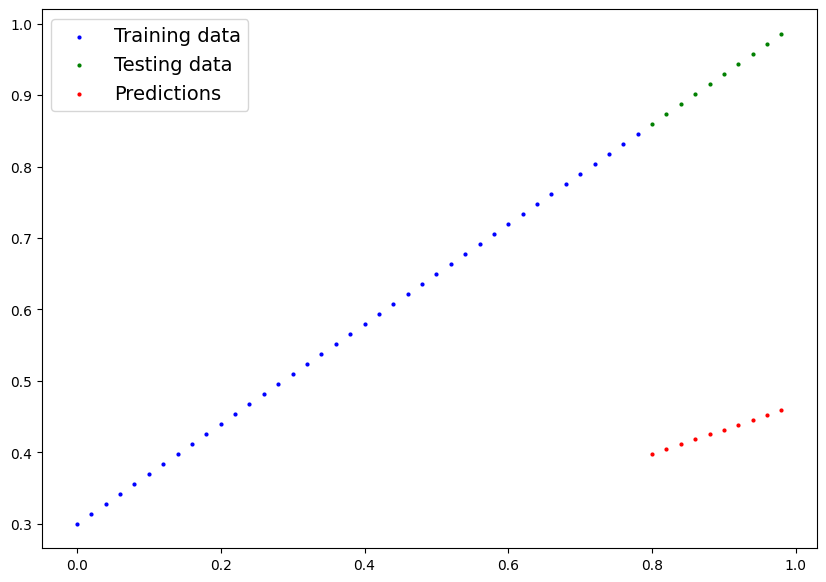

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:

# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.10) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.6053])), ('bias', tensor([0.2325]))])

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 10000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10== 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            # List named parameters
            # print(model_0.state_dict())

Epoch: 0 | MAE Train Loss: 0.966572105884552 | MAE Test Loss: 1.9171451330184937 
Epoch: 10 | MAE Train Loss: 0.36634647846221924 | MAE Test Loss: 0.9216326475143433 
Epoch: 20 | MAE Train Loss: 0.3068559765815735 | MAE Test Loss: 0.7056160569190979 
Epoch: 30 | MAE Train Loss: 0.2552739679813385 | MAE Test Loss: 0.5815297365188599 
Epoch: 40 | MAE Train Loss: 0.20379586517810822 | MAE Test Loss: 0.46774712204933167 
Epoch: 50 | MAE Train Loss: 0.15230195224285126 | MAE Test Loss: 0.34366098046302795 
Epoch: 60 | MAE Train Loss: 0.10071996599435806 | MAE Test Loss: 0.21957485377788544 
Epoch: 70 | MAE Train Loss: 0.04926692694425583 | MAE Test Loss: 0.10579236596822739 
Epoch: 80 | MAE Train Loss: 0.05994606763124466 | MAE Test Loss: 0.1806318163871765 
Epoch: 90 | MAE Train Loss: 0.05994606763124466 | MAE Test Loss: 0.1806318163871765 


In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.6230])), ('bias', tensor([0.3900]))])

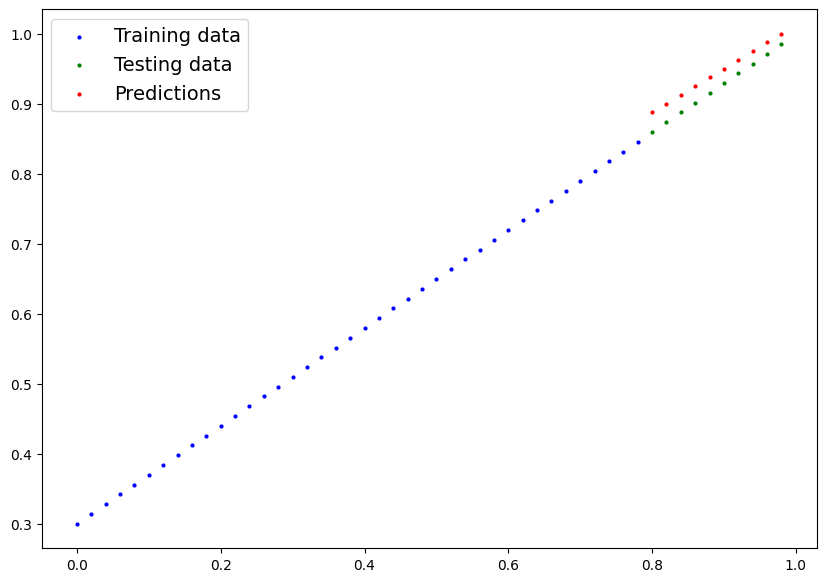

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)